In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv("Housing.csv")

In [67]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [69]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [71]:
# One-hot encode categorical features
df = pd.get_dummies(df,categorical_cols, drop_first=True)

In [72]:
df= df.astype(int)

In [73]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [74]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 0


                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.535997  0.366494   0.517545   
area                             0.535997  1.000000  0.151858   0.193820   
bedrooms                         0.366494  0.151858  1.000000   0.373930   
bathrooms                        0.517545  0.193820  0.373930   1.000000   
stories                          0.420712  0.083996  0.408564   0.326165   
parking                          0.384394  0.352980  0.139270   0.177496   
mainroad_yes                     0.296898  0.288874 -0.012033   0.042398   
guestroom_yes                    0.255517  0.140297  0.080549   0.126469   
basement_yes                     0.187057  0.047417  0.097312   0.102106   
hotwaterheating_yes              0.093073 -0.009229  0.046049   0.067159   
airconditioning_yes              0.452954  0.222393  0.160603   0.186915   
prefarea_yes                     0.329777  0.234779  0.079023   0.063472   
furnishingst

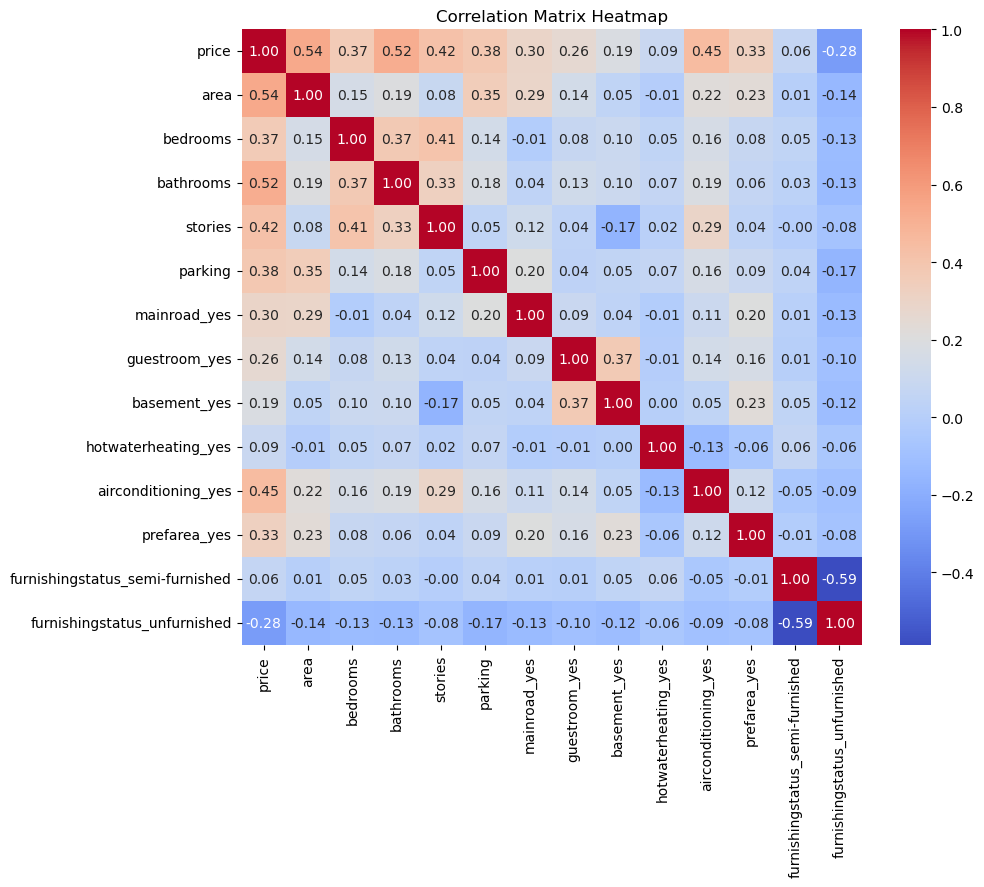

In [75]:
# Optional: visualize using a heatmap
corr_matrix = df.corr()  
print(corr_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [76]:
from sklearn.model_selection import train_test_split
# Separate features (X) and target (y)
X = df.drop("price", axis=1) 
y = df["price"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [77]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (436, 13)
X_test: (109, 13)
y_train: (436,)
y_test: (109,)


MAE: 970043.4039
MSE: 1754318687330.6646
R²: 0.6529
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
Intercept: 260032.35760741495


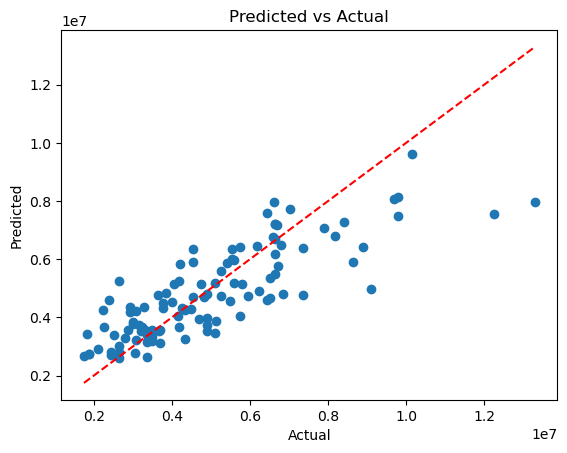

In [79]:
import matplotlib.pyplot as plt

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print(f"Intercept: {model.intercept_}")

# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()